In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from HullWhite import HullWhite
beta = np.array([1.879892, 0.579211, 	3.993992, 1.445091])
tau  = np.array([ 16.633491, 	0.319680])
reversion=0.13949636660880768 
volatility=0.017793899652989272
# HW = HullWhite(initial=0.02459103, reversion=0.03, volatility=0.00200, Gamma=1000, b=beta, tau=tau)
HW = HullWhite(initial=0.02459103, reversion=reversion, volatility=volatility, Gamma=1000, b=beta, tau=tau)

 

c:\Users\Shark\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


<AxesSubplot: >

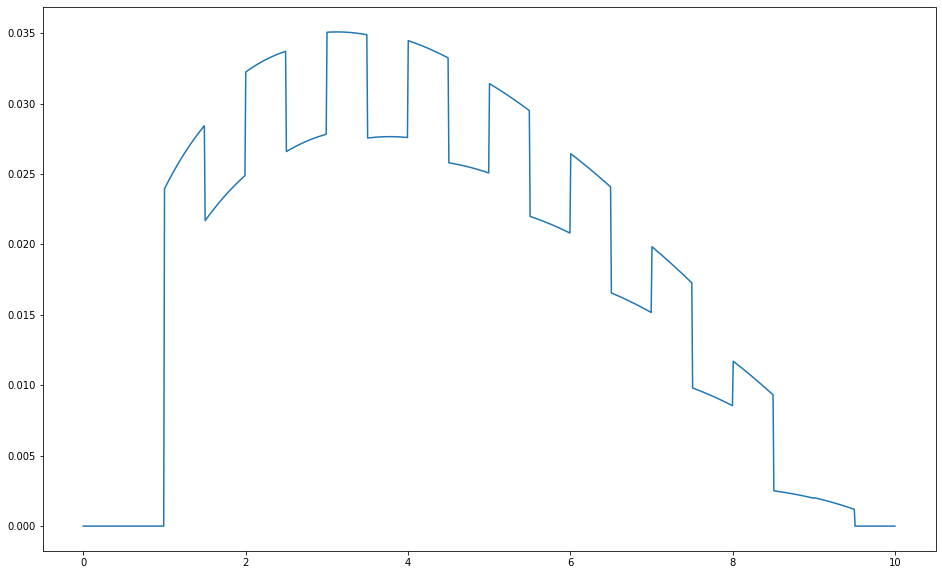

In [2]:
from scipy.optimize import fsolve
T=np.arange(0,10+0.5,0.5)
S=np.arange(0,11,1)
parSwap = fsolve(lambda x: HW.swap(0, S, T, x), x0=0.02)[0]
xaxis=np.linspace(0,10,1000)

parSwap, HW.swaption(0,1.7,S+1,T+1,parSwap, payer=True)
plt.figure(figsize=(16,10))
sns.lineplot(x=xaxis, y=[HW.swaption(t=0,Te=x, S=S,T=T,K=parSwap, payer=True) for x in xaxis])
# sns.lineplot(x=xaxis, y=[-HW.swaption(t=0,Te=x, S=S,T=T,K=parSwap, payer=False) for x in xaxis])

In [30]:
HW.ZCB(0.0,1)-HW.ZCB(0.03,1)

-0.0018757410490833903

In [33]:
T[T>0.25-0.5]
T[0]=np.maximum(T[0],0.25)

In [34]:
T

array([ 0.25,  0.5 ,  1.  ,  1.5 ,  2.  ,  2.5 ,  3.  ,  3.5 ,  4.  ,
        4.5 ,  5.  ,  5.5 ,  6.  ,  6.5 ,  7.  ,  7.5 ,  8.  ,  8.5 ,
        9.  ,  9.5 , 10.  ])

0.02459103

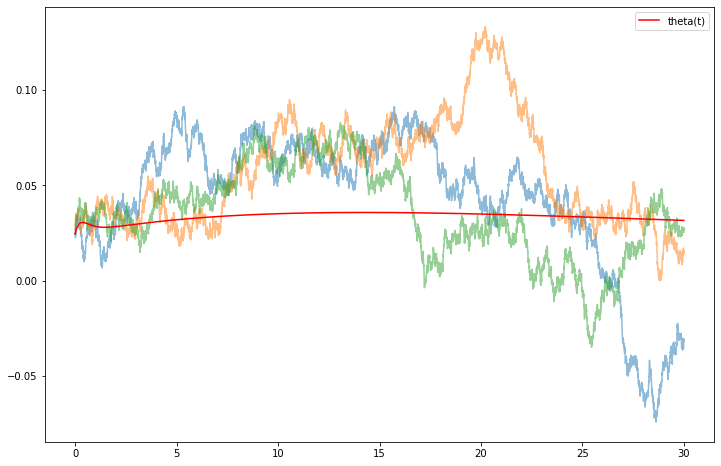

In [3]:
plt.figure(figsize=(12,8))
for i in range(3):
    np.random.seed(i)
    time, float = HW.create_path(1/365,30)
    sns.lineplot(x=time, y=float, alpha=0.5)
sns.lineplot(x=time, y=[HW.forwardCurve(t, beta, tau) for t in time], color='red', label='theta(t)')    
# sns.lineplot(x=time, y=[HW.forwardCurve(t, beta, tau)/reversion for t in time], color='blue', label='theta(t)/beta')
HW.forwardCurve(0, beta, tau)
# HW.swaption(0,12/12, S, T, K),HW.swaption(0,expiry/12, S, T, K, payer=False)

<AxesSubplot: >

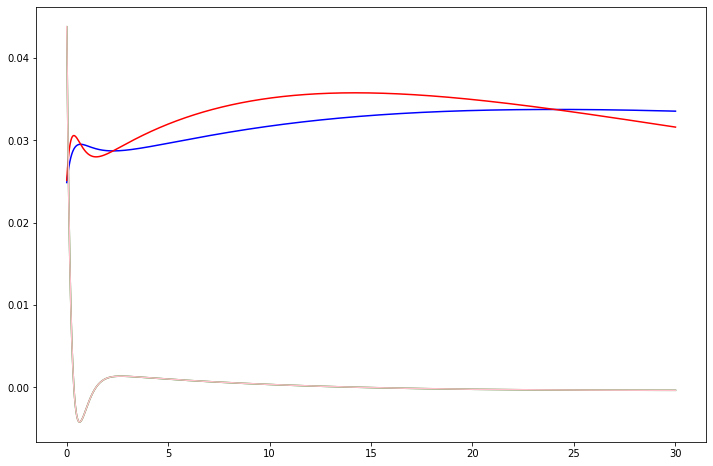

In [68]:
plt.figure(figsize=(12,8))
sns.lineplot(x=time[1::], y=[HW.yieldCurve(t) for t in time[1::]], color='blue')
sns.lineplot(x=time[1::], y=[HW.forwardCurve(t, b=beta, tau=tau) for t in time[1::]], color='red')
sns.lineplot(x=time[1::], y=[HW.forwardCurveDerivative(t, b=beta, tau=tau) for t in time[1::]], color='green')
sns.lineplot(x=time[1::], y=[HW.theta(t) for t in time[1::]], color='pink')
# sns.lineplot(x=time, y=[(1/HW.ZCB(0,t)-1)/t for t in time], color='red')

<AxesSubplot: >

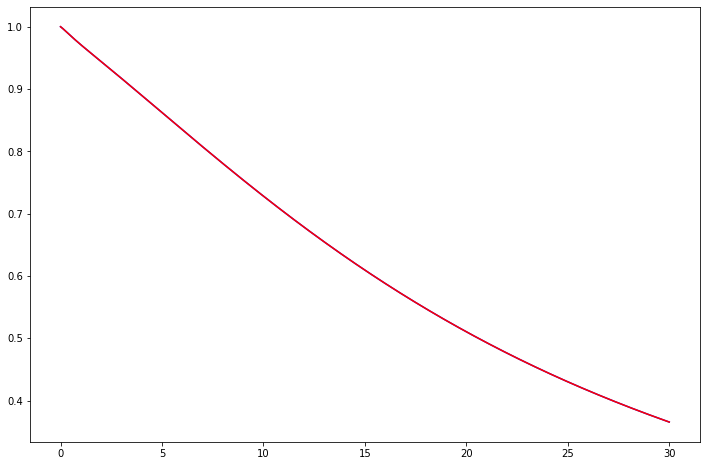

In [69]:
plt.figure(figsize=(12,8))
sns.lineplot(x=time, y=[HW.marketZCB(t) for t in time], color='blue')
sns.lineplot(x=time, y=[HW.ZCB(0,t) for t in time], color='red')

In [70]:
fix = np.arange(0,10+1,1)
flo = np.arange(0,10+0.5,0.5)
A = np.array([HW.ZCB(0,Si) for Si in fix[1::]]).sum()
B = HW.ZCB(0,fix[0])-HW.ZCB(0,fix[-1])
B/A

0.032036522307974005

C:\Users\Shark\AppData\Local\Temp\ipykernel_40676\3874077851.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(x/12)}Y' for x in straddlesobs.columns])


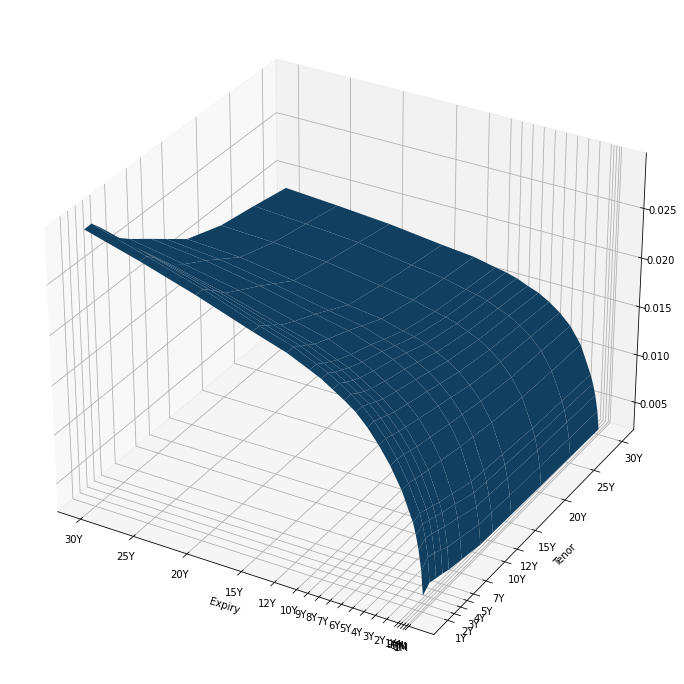

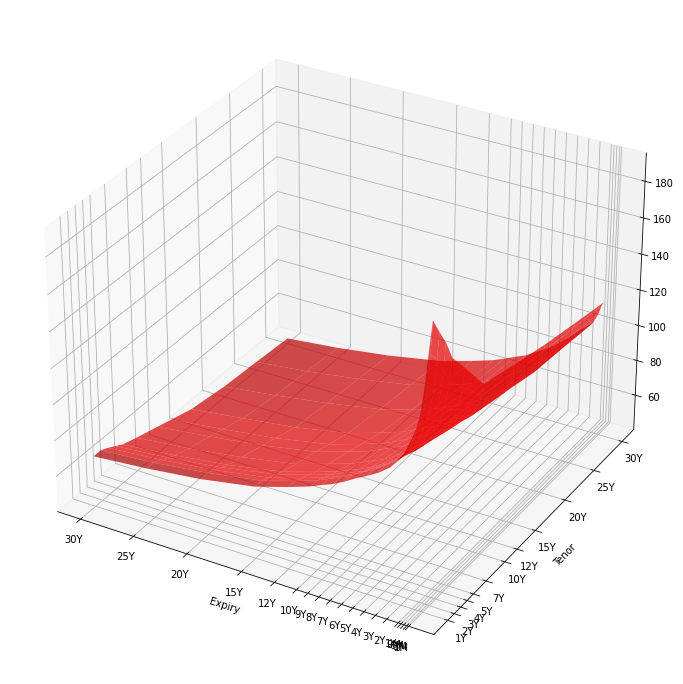

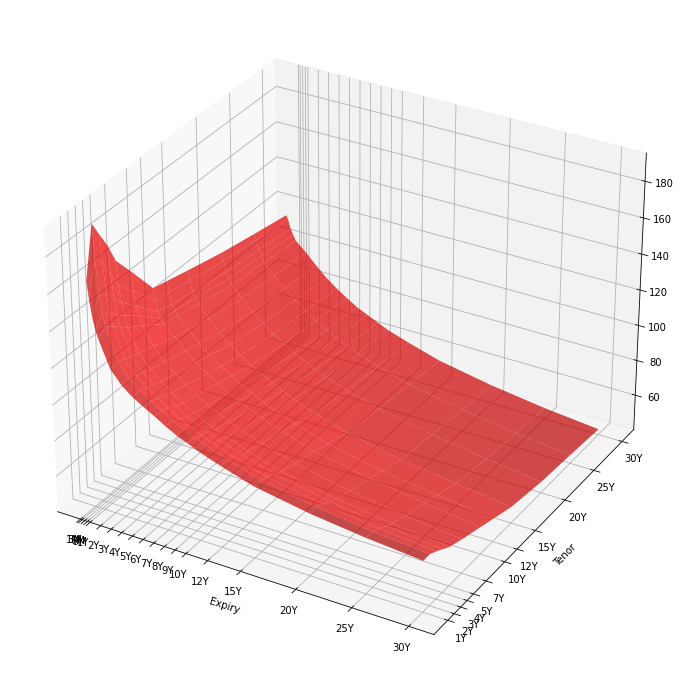

In [26]:
import pandas as pd

file_path   = 'bvolmatrix.xlsx'
sheet       = 'STRADDLE'
sheetf      = 'STRIKE'
sheeti      = 'BVOL'
df          = pd.read_excel(file_path, sheet_name=sheet,header=None)
dff         = pd.read_excel(file_path, sheet_name=sheetf,header=None)
dfi         = pd.read_excel(file_path, sheet_name=sheeti,header=None)
straddlesobs       = pd.DataFrame(df[[x for x in np.arange(4,16)]][3:22])
strikes            = pd.DataFrame(dff[[x for x in np.arange(4,16)]][3:22])
impliedVol         = pd.DataFrame(dfi[[x for x in np.arange(4,16)]][3:22])
straddlesobs.index     = df[1][3:22].values
strikes.index          = dff[1][3:22].values
impliedVol.index       = dfi[1][3:22].values
straddlesobs.index.name='Expiry'
strikes.index.name     ='Expiry'
impliedVol.index.name  ='Expiry' 
straddlesobs.columns   = [int(x) for x in df.iloc[1][4:16].values]
strikes.columns        = [int(x) for x in dff.iloc[1][4:16].values]
impliedVol.columns     = [int(x) for x in dfi.iloc[1][4:16].values]
# straddlesobs
sheeta      = 'ARTICLE'
dfff        = pd.read_excel(file_path, sheet_name=sheeta,header=None)
articleobs  = dfff[[x for x in np.arange(4,17)]][3:17]/10000
articleobs.index = dfff[1][3:17].values
articleobs.index.name = 'Expiry'
articleobs.columns = [int(x) for x in dfff.iloc[1][4:17].values]

# straddlesobs=straddlesobs.iloc[4::,2::]
# strikes = strikes.iloc[4::,2::]
# impliedVol = impliedVol.iloc[4::,2::]

def monthoryear(x):
    if x<12:
        return f'{int(x)}M'
    else:
        return f'{int(x/12)}Y'
    

X,Y = np.meshgrid(straddlesobs.columns/12, straddlesobs.index/12)
fig = plt.figure(figsize=(12,16))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y,X,straddlesobs.values)
ax.set_xlabel('Expiry')
ax.set_xticks((straddlesobs.index/12))
ax.set_xticklabels([monthoryear(x) for x in straddlesobs.index])
ax.set_ylabel('Tenor')
ax.set_yticklabels([f'{int(x/12)}Y' for x in straddlesobs.columns])
ax.set_yticks(straddlesobs.columns/12)
ax.invert_xaxis()
plt.show()

fig = plt.figure(figsize=(12,16))
X,Y = np.meshgrid(impliedVol.columns/12, impliedVol.index/12)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y,X,impliedVol.values, alpha=0.7, color='red')

ax.set_xlabel('Expiry')
ax.set_xticks((straddlesobs.index/12))
ax.set_xticklabels([monthoryear(x) for x in straddlesobs.index])
ax.set_ylabel('Tenor')
ax.set_yticks(straddlesobs.columns/12)
ax.set_yticklabels([f'{int(x/12)}Y' for x in straddlesobs.columns])
ax.invert_xaxis()
plt.show()

fig = plt.figure(figsize=(12,16))
X,Y = np.meshgrid(impliedVol.columns/12, impliedVol.index/12)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y,X,impliedVol.values*10000, alpha=0.7, color='red')

ax.set_xlabel('Expiry')
ax.set_xticks((straddlesobs.index/12))
ax.set_xticklabels([monthoryear(x) for x in straddlesobs.index])
ax.set_ylabel('Tenor')
ax.set_yticks(straddlesobs.columns/12)
ax.set_yticklabels([f'{int(x/12)}Y' for x in straddlesobs.columns])

plt.show()

In [28]:
from scipy.optimize import minimize, basinhopping, fsolve
def HullWhiteOptimizer(reversion,volatility, observedP, observedK):
    if volatility <= 0:
        print('Volatility is negative')
        return 100000, 100000
    straddleModel = observedP.copy()
    optHW = HullWhite(initial=0.02748672, 
                      reversion=reversion, 
                      Gamma=1000, 
                      b = np.array([1.879892, 0.579211, 	3.993992, 1.445091]),
                      tau  = np.array([ 16.633491, 	0.319680]),
                      volatility=volatility)
    for expiry in observedP.index:
        # Expiry first
        # Getting the right expiry and converting to years
        
        for tenor in observedP.columns:
            # Creating tenor legs
            T = np.arange(expiry/12, expiry/12+tenor/12+0.5, 0.5)
            S = np.arange(expiry/12, expiry/12+tenor/12+1)
            # Finding the ATM fixed rate
            K = observedK[tenor].loc[expiry]/100
            # K = fsolve(lambda x: optHW.swap(0, S, T, x), x0=MarketATM)[0]

            #Calculating the payer and receiver swpt price
            p = optHW.swaption(0,Te=expiry/12, S=S,T=T, K=K, payer=True)
            r = optHW.swaption(0,Te=expiry/12, S=S, T=T, K=K, payer=False)
            
            #Normalizing w.r.t. to the A(t,S) function (2.10) everythin you wanna know...
            A = np.array([optHW.marketZCB(Si) for Si in S[1::]]).sum()

            straddleModel[tenor].loc[expiry] = (p+r)/A
            # if (p+r)*10000<0:
            # print(p,r,expiry,tenor,reversion,volatility)
            

    error = ((straddleModel/observedP-1)**2).sum().sum()
    # print(f'{error}', end='                                                         \r')
    return error,straddleModel

In [29]:
Nfeval = 0
def callback(xk):
    global Nfeval
    print(f'Eval: {Nfeval}, x={(xk[0],xk[1])}, func: {HullWhiteOptimizer(xk[0], xk[1], observedP=straddlesobs, observedK=strikes)[0]}')
    Nfeval += 1
    return True
# callback([0.027832947, 0.11874695, 0.019677])

result = minimize(
    fun = lambda x: HullWhiteOptimizer(reversion=x[0], volatility=x[1], observedP=straddlesobs, observedK=strikes)[0],
    x0  = np.array([2,0.002]),
    # bounds = [(0.1,3),(1e-15,0.5)],
    # method='nelder-mead',
    # tol = 1e-10,
    callback=callback
)

Eval: 0, x=(2.0014902370305365, 0.09610501863648109), func: 55.320420896306274


c:\Users\Shark\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\Shark\OneDrive\Desktop\MasterThesis\HullWhite.py:155: RuntimeWarning: divide by zero encountered in double_scalars
  h      = np.log(self.ZCB(t,S)/(self.ZCB(t,T)*X))/sigmap+sigmap/2
c:\Users\Shark\OneDrive\Desktop\MasterThesis\HullWhite.py:155: RuntimeWarning: invalid value encountered in double_scalars
  h      = np.log(self.ZCB(t,S)/(self.ZCB(t,T)*X))/sigmap+sigmap/2


Eval: 1, x=(1.9972398002325908, 0.09863235072054549), func: 55.2857072410368
Volatility is negative
Volatility is negative
Volatility is negative
Volatility is negative
Volatility is negative
Volatility is negative
Eval: 2, x=(0.204534920869351, 0.024816262301034966), func: 24.189162431328285
Volatility is negative
Volatility is negative
Volatility is negative
Eval: 3, x=(0.20342138202380275, 0.024763107406818596), func: 24.183006611234493
Eval: 4, x=(0.190240099730105, 0.023456747665359115), func: 23.181614004426596
Eval: 5, x=(0.16214376515933826, 0.020660520370664126), func: 21.50037535342248
Eval: 6, x=(0.12154326847412589, 0.016097291024024248), func: 20.939710318974086
Eval: 7, x=(0.14668835998049853, 0.018296518455637473), func: 20.68738952667211
Eval: 8, x=(0.14003991727045434, 0.017863558128342893), func: 20.66581011641599
Eval: 9, x=(0.139481817939527, 0.017785473914601273), func: 20.66526924952284
Eval: 10, x=(0.1394888941460445, 0.017793570126501262), func: 20.6652496824133

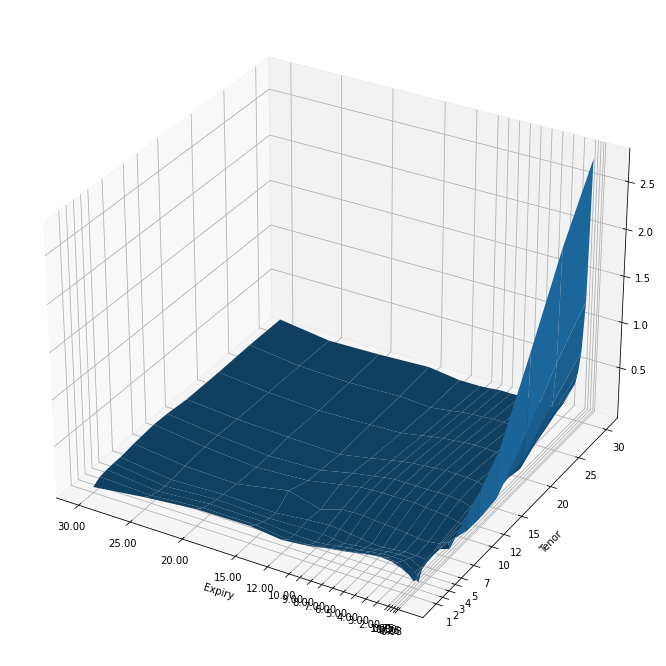

20.66524965184591

In [50]:
rev=result.x[0]
vol=result.x[1]
fittedHW = (abs(HullWhiteOptimizer(reversion=rev ,volatility=vol, observedP=straddlesobs, observedK=strikes)[1]/straddlesobs-1))
X,Y = np.meshgrid(fittedHW.columns/12, fittedHW.index/12)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y,X,fittedHW.values)
ax.set_xlabel('Expiry')
ax.set_xticks((fittedHW.index/12)[::-1])
ax.set_ylabel('Tenor')
ax.set_yticks(fittedHW.columns/12)
ax.invert_xaxis()
plt.show()
HullWhiteOptimizer(reversion=rev ,volatility=vol, observedP=straddlesobs, observedK=strikes)[0]

In [57]:
HW.ZCB(0,10),HW.marketZCB(10)

(0.7280490594970028, 0.7280490594970028)

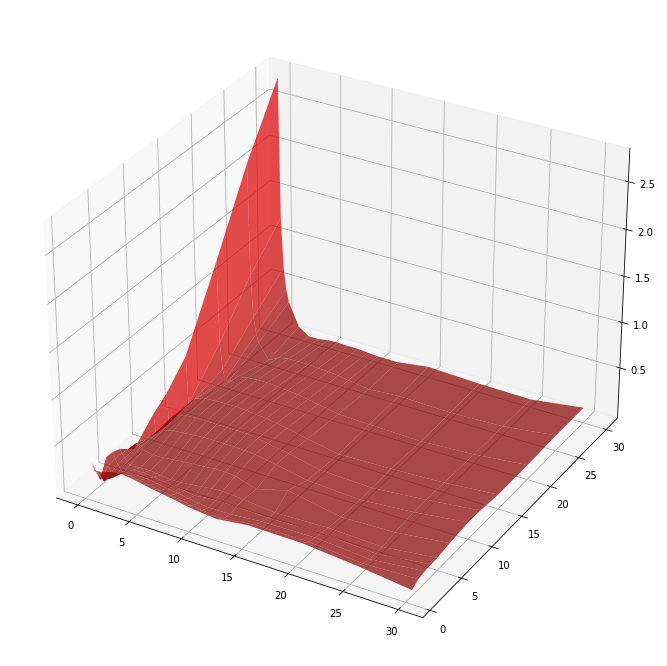

In [51]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(straddlesobs.columns/12, straddlesobs.index/12)
ax1.plot_surface(Y,X,straddlesobs.values, alpha=0.7, color='blue')

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y,X,fittedHW.values, alpha=0.7, color='red')



ax1.set_xlabel('Expiry')
ax1.set_xticks((straddlesobs.index/12)[::-1])
ax1.set_ylabel('Tenor')
ax1.set_yticks(straddlesobs.columns/12)
ax1.invert_xaxis()

# ax1 = fig.add_subplot(111, projection='3d')


plt.show()

<AxesSubplot: >

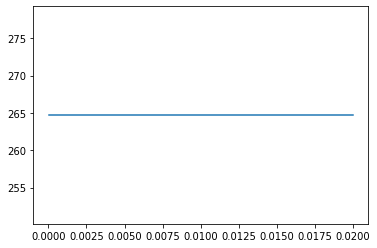

In [99]:
sns.lineplot(x=np.linspace(0.00001,0.02,10), y=[HullWhiteOptimizer(reversion=0.88 ,volatility=vol, observedP=straddlesobs, observedK=strikes)[0] for vol in np.linspace(0.00001,0.02,10)])